## Loading the data

In [1]:
import pandas
from sklearn.datasets import load_boston # deprecated

X, y = load_boston(return_X_y=True)
df = pandas.DataFrame(X, columns=['crim','zn','indus','chas','nox',
                              'rm','age','dis','rad','tax','ptratio',
                              'b','lstat'])

In [2]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
import matplotlib.pyplot as plt

In [5]:
lstat = df['lstat'] > df['lstat'].median() # CONVENIENCE ~ z

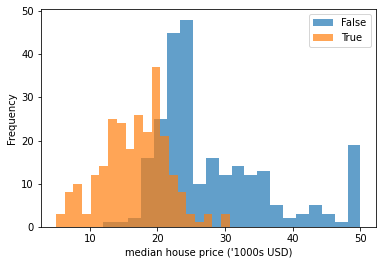

In [8]:
pandas.Series(y).groupby(lstat).plot.hist(bins=20, alpha=0.7)
plt.xlabel('median house price (\'1000s USD)')
plt.legend()

## Modify the Data

In [9]:
from sklearn.linear_model import LinearRegression
from sklego.preprocessing import InformationFilter
import numpy

In [18]:
Xfull = df
Xdrop = df.drop(columns=['lstat', 'b'])
Xfair = InformationFilter(columns=['lstat', 'b']).fit_transform(df)

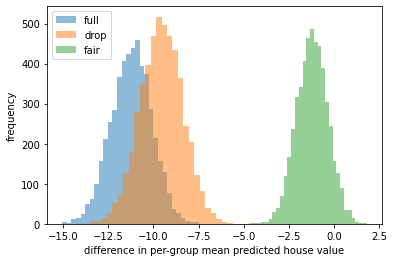

In [20]:
for l, X in [('full', Xfull), ('drop', Xdrop), ('fair', Xfair)]:
    pred = LinearRegression().fit(X, y).predict(X)
    grp1 = numpy.random.choice(pred[lstat], (5000, 50)).mean(axis=1)
    grp2 = numpy.random.choice(pred[~lstat], (5000, 50)).mean(axis=1)
    plt.hist(grp1 - grp2, bins=30, alpha=0.5, label=l)
plt.xlabel('difference in per-group mean predicted house value')
plt.ylabel('frequency')
plt.legend()